In [1]:
import numpy as np
import pandas as pd

pd.options.display.max_columns = None

from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("../data/game_data_2.csv")

print(df.shape)
df.head()

(23958, 51)


,Team_ID,Game_ID,GAME_DATE,MATCHUP,WL,W,L,PTS,team,season_start_year,opponent_abbreviation,team_abbreviation,is_home_game,is_covid_bubble,city_team_key,abbreviation,Latitude,Longitude,Latitude_opponent,Longitude_opponent,PTS_opponent,point_difference,game_lat,game_lon,prev_game_lon,prev_game_lat,distance_from_previous_game,is_last_game_home,start_of_streak,streak_id,streak_counter,incoming_away_game_streak,days_since_1_games_ago,days_since_2_games_ago,days_since_3_games_ago,days_since_4_games_ago,days_since_5_games_ago,days_since_6_games_ago,days_since_7_games_ago,num_games_last_4_days,num_games_last_7_days,cumulative_distance,incoming_away_game_streak_opponent,days_since_1_games_ago_opponent,num_games_last_4_days_opponent,num_games_last_7_days_opponent,cumulative_distance_opponent,days_of_rest_difference,games_last_7_diff,distance_difference,target
0,1610612737,21300012,2013-10-30,ATL @ DAL,L,0,1,109,Atlanta Hawks,2013,DAL,ATL,0,0,Atlanta Hawks,ATL,33.757,84.396,32.791,96.810,118,-9,32.791,96.810,84.396,33.757,718.172413,0,True,1,1,0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,0,0,718.172413,0,150.0,0,0,1022.608415,0.0,0,-304.436002,1
1,1610612737,21300023,2013-11-01,ATL vs. TOR,W,1,1,102,Atlanta Hawks,2013,TOR,ATL,1,0,Atlanta Hawks,ATL,33.757,84.396,43.644,79.379,95,7,33.757,84.396,96.810,32.791,718.172413,0,True,2,1,0,2.0,150.0,150.0,150.0,150.0,150.0,150.0,1,1,1436.344826,0,2.0,1,1,732.742992,0.0,0,703.601833,0
2,1610612737,21300046,2013-11-03,ATL @ LAL,L,1,2,103,Atlanta Hawks,2013,LAL,ATL,0,0,Atlanta Hawks,ATL,33.757,84.396,34.043,118.267,105,-2,34.043,118.267,84.396,33.757,1929.261873,1,True,3,1,0,2.0,4.0,150.0,150.0,150.0,150.0,150.0,2,2,1929.261873,0,2.0,2,3,0.000000,0.0,-1,1929.261873,1
3,1610612737,21300059,2013-11-05,ATL @ SAC,W,2,2,105,Atlanta Hawks,2013,SAC,ATL,0,0,Atlanta Hawks,ATL,33.757,84.396,38.580,121.500,100,5,38.580,121.500,118.267,34.043,360.614957,0,False,3,2,1,2.0,4.0,6.0,150.0,150.0,150.0,150.0,2,3,2289.876831,0,3.0,2,3,137.493424,-1.0,0,2152.383406,0
4,1610612737,21300071,2013-11-07,ATL @ DEN,L,2,3,107,Atlanta Hawks,2013,DEN,ATL,0,0,Atlanta Hawks,ATL,33.757,84.396,39.749,105.008,109,-2,39.749,105.008,121.500,38.580,883.947602,0,False,3,3,2,2.0,4.0,6.0,8.0,150.0,150.0,150.0,2,3,3173.824432,0,2.0,1,2,0.000000,0.0,1,3173.824432,1


In [ ]:


# drop covid games
df = df[df['is_covid_bubble'] == 0].copy()
print(df.shape[0])

# train/test split
# use 2021 and 2022 seasons as hold out
train_raw = df[
    ~df['season_start_year'].isin([2021, 2022])
]

test_raw = df[
    df['season_start_year'].isin([2021, 2022])
]

print(train_raw.shape)
print(test_raw.shape)


In [9]:
df['season_start_year'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [10]:
df.columns

Index(['Team_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'W', 'L', 'PTS',
       'team', 'season_start_year', 'opponent_abbreviation',
       'team_abbreviation', 'is_home_game', 'is_covid_bubble', 'city_team_key',
       'abbreviation', 'Latitude', 'Longitude', 'Latitude_opponent',
       'Longitude_opponent', 'PTS_opponent', 'point_difference', 'game_lat',
       'game_lon', 'prev_game_lon', 'prev_game_lat',
       'distance_from_previous_game', 'is_last_game_home', 'start_of_streak',
       'streak_id', 'streak_counter', 'incoming_away_game_streak',
       'days_since_1_games_ago', 'days_since_2_games_ago',
       'days_since_3_games_ago', 'days_since_4_games_ago',
       'days_since_5_games_ago', 'days_since_6_games_ago',
       'days_since_7_games_ago', 'num_games_last_4_days',
       'num_games_last_7_days', 'cumulative_distance',
       'incoming_away_game_streak_opponent', 'days_since_1_games_ago_opponent',
       'num_games_last_4_days_opponent', 'num_games_last_7_days_oppon

In [ ]:
# number of 4 in 5 sets by season

# number of 5 in 7 sets by season

# number of back-to-backs by season

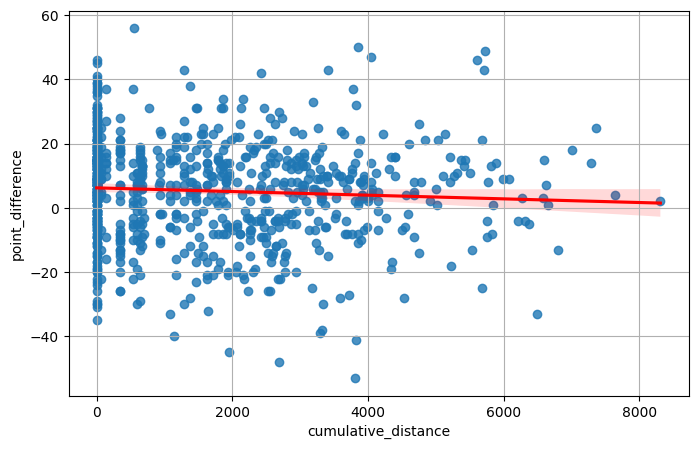

In [18]:
plt.figure(figsize=(8,5))
# temp_df = df
temp_df = df[
    (df['team_abbreviation'] == "GSW")
    # & (df['season_start_year'] == 2018)
#     (df['cumulative_distance'] > 3000)
#     & (df['incoming_away_game_streak'] > 2)
]
sns.regplot(x = "cumulative_distance", y="point_difference", data=temp_df, line_kws={"color":"red"})
plt.grid()


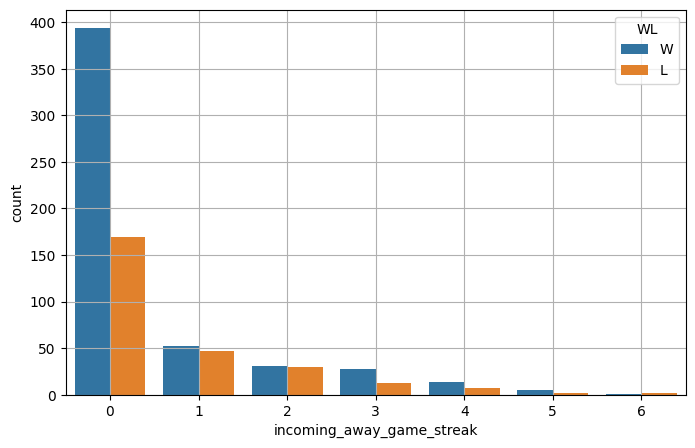

In [19]:
plt.figure(figsize=(8,5))


sns.countplot(x = "incoming_away_game_streak", hue="WL", data=temp_df)
plt.grid()


In [13]:
temp_df = df[df['team_abbreviation'] == "ATL"]
print(temp_df.shape)
temp_df.head()

(795, 48)


,Team_ID,Game_ID,GAME_DATE,MATCHUP,WL,W,L,PTS,team,season_start_year,opponent_abbreviation,team_abbreviation,is_home_game,is_covid_bubble,city_team_key,abbreviation,Latitude,Longitude,Latitude_opponent,Longitude_opponent,PTS_opponent,point_difference,game_lat,game_lon,prev_game_lon,prev_game_lat,distance_from_previous_game,is_last_game_home,start_of_streak,streak_id,streak_counter,incoming_away_game_streak,days_since_1_games_ago,days_since_2_games_ago,days_since_3_games_ago,days_since_4_games_ago,days_since_5_games_ago,days_since_6_games_ago,days_since_7_games_ago,num_games_last_4_days,num_games_last_7_days,cumulative_distance,incoming_away_game_streak_opponent,days_since_1_games_ago_opponent,num_games_last_4_days_opponent,num_games_last_7_days_opponent,cumulative_distance_opponent,days_of_rest_difference
0,1610612737,21300012,2013-10-30,ATL @ DAL,L,0,1,109,Atlanta Hawks,2013,DAL,ATL,0,0,Atlanta Hawks,ATL,33.757,84.396,32.791,96.810,118,-9,32.791,96.810,84.396,33.757,718.172413,0,True,1,1,0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,0,0,718.172413,0,150.0,0,0,1022.608415,0.0
1,1610612737,21300023,2013-11-01,ATL vs. TOR,W,1,1,102,Atlanta Hawks,2013,TOR,ATL,1,0,Atlanta Hawks,ATL,33.757,84.396,43.644,79.379,95,7,33.757,84.396,96.810,32.791,718.172413,0,True,2,1,0,2.0,150.0,150.0,150.0,150.0,150.0,150.0,1,1,1436.344826,0,2.0,1,1,732.742992,0.0
2,1610612737,21300046,2013-11-03,ATL @ LAL,L,1,2,103,Atlanta Hawks,2013,LAL,ATL,0,0,Atlanta Hawks,ATL,33.757,84.396,34.043,118.267,105,-2,34.043,118.267,84.396,33.757,1929.261873,1,True,3,1,0,2.0,4.0,150.0,150.0,150.0,150.0,150.0,2,2,1929.261873,0,2.0,2,3,0.000000,0.0
3,1610612737,21300059,2013-11-05,ATL @ SAC,W,2,2,105,Atlanta Hawks,2013,SAC,ATL,0,0,Atlanta Hawks,ATL,33.757,84.396,38.580,121.500,100,5,38.580,121.500,118.267,34.043,360.614957,0,False,3,2,1,2.0,4.0,6.0,150.0,150.0,150.0,150.0,2,3,2289.876831,0,3.0,2,3,137.493424,-1.0
4,1610612737,21300071,2013-11-07,ATL @ DEN,L,2,3,107,Atlanta Hawks,2013,DEN,ATL,0,0,Atlanta Hawks,ATL,33.757,84.396,39.749,105.008,109,-2,39.749,105.008,121.500,38.580,883.947602,0,False,3,3,2,2.0,4.0,6.0,8.0,150.0,150.0,150.0,2,3,3173.824432,0,2.0,1,2,0.000000,0.0
